In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm  # 行列指数関数


In [2]:
# 定数とパラメータ
t_values = np.linspace(0, 2, 500)  # t の範囲 [0, 2] を500分割
pi = np.pi

# パウリZ演算子と初期状態 rho
I = np.eye(2)
Z = np.array([[1, 0], [0, -1]], dtype=complex)  # パウリZ行列
H = -Z+2*I  # ハミルトニアン H
H_norm = np.linalg.norm(H,ord=2)
alpha = 0.9
ket_0 = np.array([[alpha], [np.sqrt(1-alpha**2)]], dtype=complex) # |0>
rho = np.dot(ket_0, ket_0.conj().T)  # 密度演算子 rho = |0><0|

# 行列指数関数を用いた期待値の実部と虚部を計算
expectation_values_real = [
    np.trace(rho @ expm(-2j * pi * H * t)).real for t in t_values
]
expectation_values_imag = [
    np.trace(rho @ expm(-2j * pi * H * t)).imag for t in t_values
]
print(H)
print(H_norm)

[[1.+0.j 0.+0.j]
 [0.+0.j 3.+0.j]]
3.0


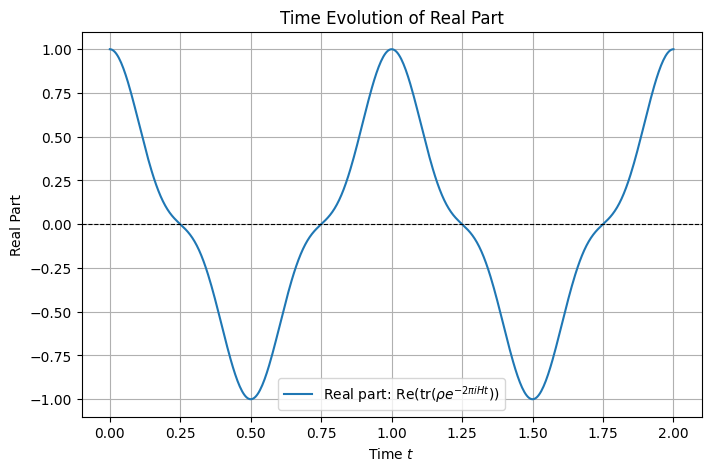

In [3]:
# 実部のプロット
plt.figure(figsize=(8, 5))
plt.plot(t_values, expectation_values_real, label=r"Real part: $\mathrm{Re}(\mathrm{tr}(\rho e^{-2 \pi i H t}))$")
plt.xlabel("Time $t$")
plt.ylabel("Real Part")
plt.title("Time Evolution of Real Part")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend()
plt.grid()
plt.show()

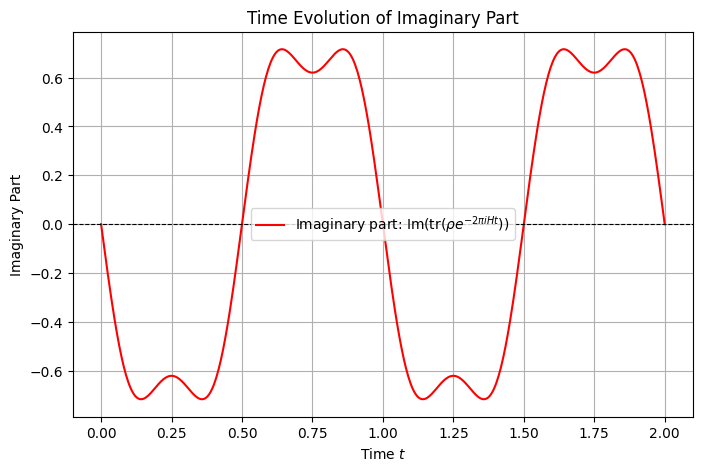

In [4]:
# 虚部のプロット
plt.figure(figsize=(8, 5))
plt.plot(t_values, expectation_values_imag, label=r"Imaginary part: $\mathrm{Im}(\mathrm{tr}(\rho e^{-2 \pi i H t}))$", color="red")
plt.xlabel("Time $t$")
plt.ylabel("Imaginary Part")
plt.title("Time Evolution of Imaginary Part")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend()
plt.grid()
plt.show()

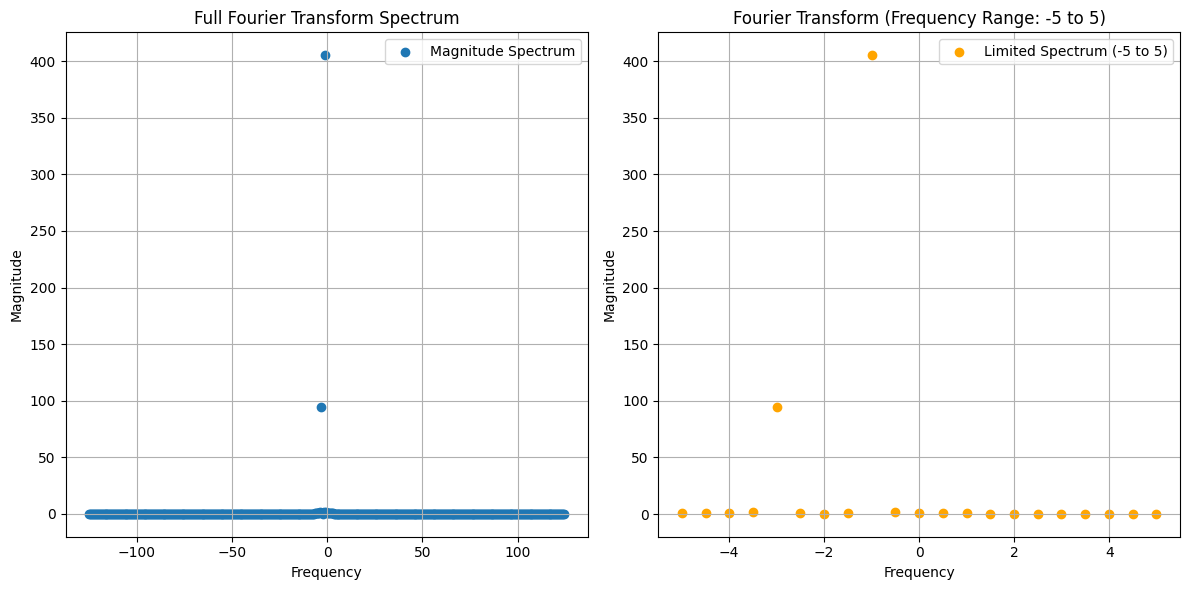

In [5]:
# フーリエ変換
expectation_values = np.array(expectation_values_real) + 1j*np.array(expectation_values_imag)
fft_result = np.fft.fft(expectation_values)  # 信号に対してFFT
frequencies = np.fft.fftfreq(len(t_values), d=(t_values[1] - t_values[0]))  # 周波数

# 周波数を -5 から 5 に限定
limited_indices = (frequencies >= -5) & (frequencies <= 5)

# サブプロットの作成
plt.figure(figsize=(12, 6))

# フーリエスペクトル全体のプロット
plt.subplot(1, 2, 1)
plt.scatter(frequencies, np.abs(fft_result), label="Magnitude Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Full Fourier Transform Spectrum")
plt.legend()
plt.grid()

# 周波数範囲を限定したスペクトルのプロット
plt.subplot(1, 2, 2)
plt.scatter(frequencies[limited_indices], np.abs(fft_result)[limited_indices], label="Limited Spectrum (-5 to 5)", color="orange")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Transform (Frequency Range: -5 to 5)")
plt.legend()
plt.grid()

# レイアウト調整と表示
plt.tight_layout()
plt.show()


In [6]:
tau = pi / 3 / H_norm
j_values = np.arange(100)  # t の範囲 [0, 2] を500分割
# 行列指数関数を用いた期待値の実部と虚部を計算
expectation_values_real = [
    np.trace(rho @ expm(-1j * H * tau * j)).real for j in j_values
]
expectation_values_imag = [
    np.trace(rho @ expm(-1j * H * tau * j)).imag for j in j_values
]
print(tau)

0.3490658503988659


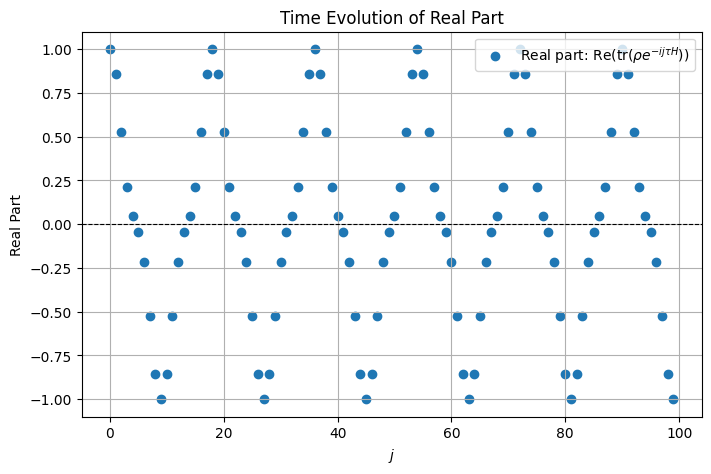

In [11]:
# 実部のプロット
plt.figure(figsize=(8, 5))
plt.scatter(j_values, expectation_values_real, label=r"Real part: $\mathrm{Re}(\mathrm{tr}(\rho e^{- i j \tau H}))$")
plt.xlabel("$j$")
plt.ylabel("Real Part")
plt.title("Time Evolution of Real Part")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend()
plt.grid()
plt.show()

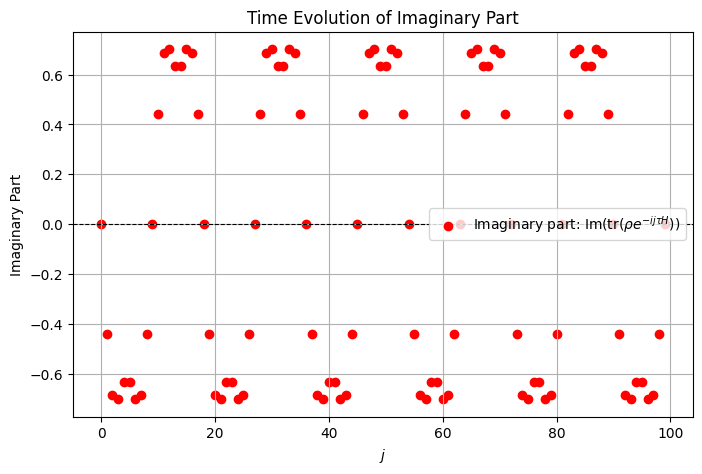

In [10]:
# 虚部のプロット
plt.figure(figsize=(8, 5))
plt.scatter(j_values, expectation_values_imag, label=r"Imaginary part: $\mathrm{Im}(\mathrm{tr}(\rho e^{- i j \tau H}))$", color="red")
plt.xlabel("$j$")
plt.ylabel("Imaginary Part")
plt.title("Time Evolution of Imaginary Part")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend()
plt.grid()
plt.show()

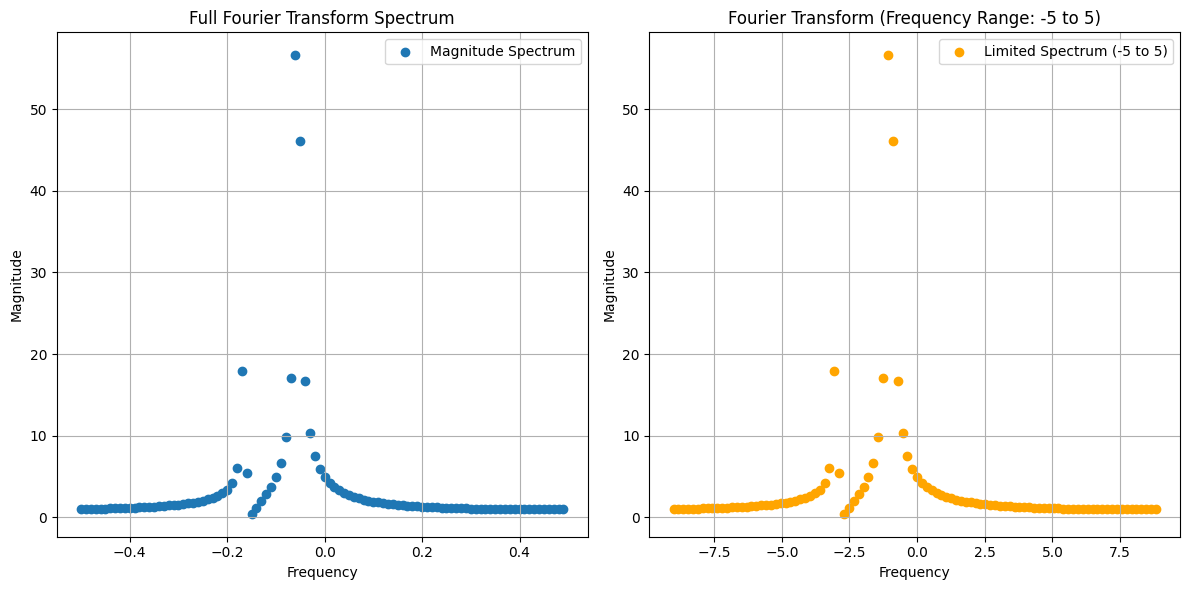

In [ ]:
# フーリエ変換
expectation_values = np.array(expectation_values_real) + 1j*np.array(expectation_values_imag)
fft_result = np.fft.fft(expectation_values)  # 信号に対してFFT
frequencies = np.fft.fftfreq(len(j_values), d=(j_values[1] - j_values[0]))  # 周波数

# 周波数を -5 から 5 に限定
limited_indices = (frequencies >= -5) & (frequencies <= 5)

# サブプロットの作成
plt.figure(figsize=(12, 6))

# フーリエスペクトル全体のプロット
plt.subplot(1, 2, 1)
plt.scatter(frequencies, np.abs(fft_result), label="Magnitude Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Full Fourier Transform Spectrum")
plt.legend()
plt.grid()

# 周波数範囲を限定したスペクトルのプロット
plt.subplot(1, 2, 2)
plt.scatter(frequencies[limited_indices], np.abs(fft_result)[limited_indices], label="Limited Spectrum (-5 to 5)", color="orange")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Transform (Frequency Range: -5 to 5)")
plt.legend()
plt.grid()

# レイアウト調整と表示
plt.tight_layout()
plt.show()

## 2*pi/tau*frequencies = energies


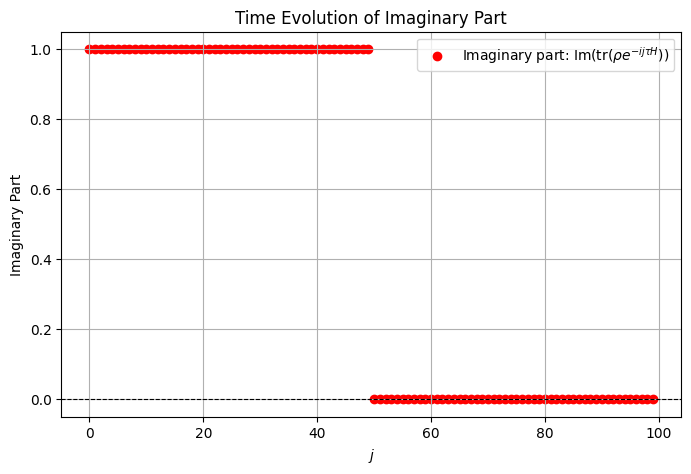

In [20]:
heaviside = np.array([1 if f>=0 else 0 for f in frequencies])
ifft_heaviside = np.fft.ifft(heaviside)
plt.figure(figsize=(8, 5))
plt.scatter(j_values, heaviside, label=r"Imaginary part: $\mathrm{Im}(\mathrm{tr}(\rho e^{- i j \tau H}))$", color="red")
plt.xlabel("$j$")
plt.ylabel("Imaginary Part")
plt.title("Time Evolution of Imaginary Part")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend()
plt.grid()
plt.show()


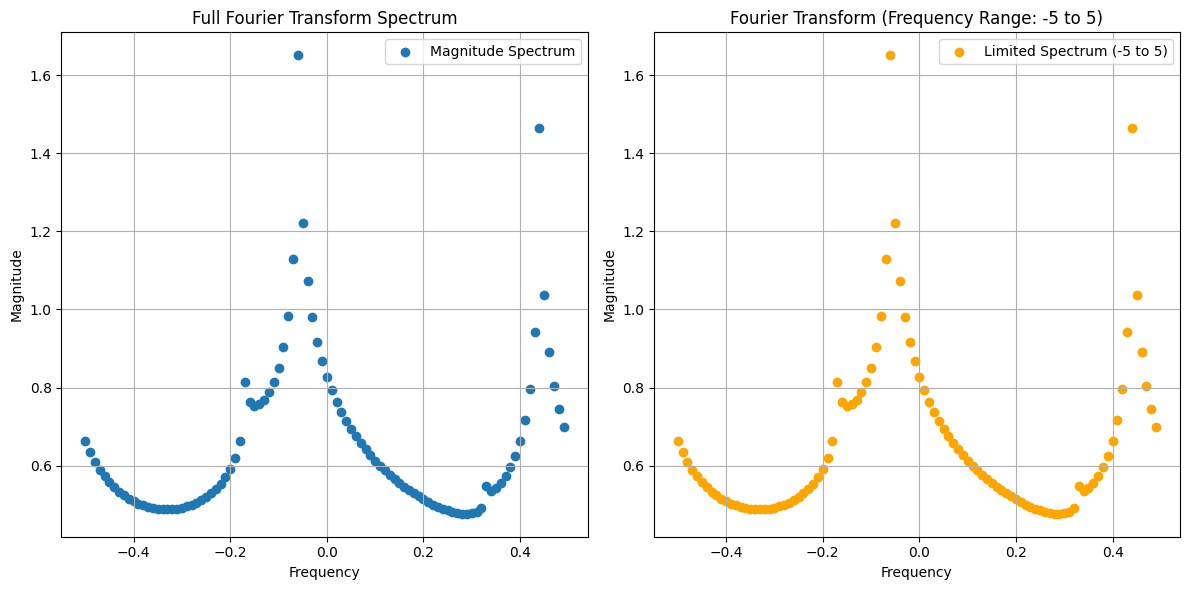

In [21]:
# フーリエ変換
fft_result = np.fft.fft(ifft_heaviside*expectation_values)  # 信号に対してFFT

# 周波数を -5 から 5 に限定
limited_indices = (frequencies >= -5) & (frequencies <= 5)

# サブプロットの作成
plt.figure(figsize=(12, 6))

# フーリエスペクトル全体のプロット
plt.subplot(1, 2, 1)
plt.scatter(frequencies, np.abs(fft_result), label="Magnitude Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Full Fourier Transform Spectrum")
plt.legend()
plt.grid()

# 周波数範囲を限定したスペクトルのプロット
plt.subplot(1, 2, 2)
plt.scatter(frequencies[limited_indices], np.abs(fft_result)[limited_indices], label="Limited Spectrum (-5 to 5)", color="orange")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Transform (Frequency Range: -5 to 5)")
plt.legend()
plt.grid()

# レイアウト調整と表示
plt.tight_layout()
plt.show()
